<a href="https://colab.research.google.com/github/sbs23003/CA-Contstruction-Industry/blob/main/datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

"""
# Housing Prices dataset - Columns 'Quarter', 'Value' where 'Type of Employee' = "All employees" and 'Economic Sector NACE Rev 2' = "Construction (F)"
df_housingPrices = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/HPA09/CSV/1.0/en')

# Rent Prices dataset - Columns 'Quarter', 'Value' where 'Type of Employee' = "All employees" and 'Economic Sector NACE Rev 2' = "Construction (F)"
df_rentPrices = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/RIA02/CSV/1.0/en')
#df_GDP = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5454986.csv')

# Labour Costs dataset - Columns 'Quarter', 'Value' where 'Type of Employee' = "All employees" and 'Economic Sector NACE Rev 2' = "Construction (F)"
df_labourCosts = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/EHQ03/CSV/1.0/en')

# Construction Workers dataset - Columns 'Quarter', 'Value' where 'Sex' = "Both Sexes"
df_constructionWorkers = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/QLF03/CSV/1.0/en')

# Buildings Built dataset - Columns 'Year' and 'Values'
df_buildingsBuilt = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/NDA02/CSV/1.0/en')
df_buildingsBuiltEircodes = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/NDA01/CSV/1.0/en')
df_immigration = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA15/CSV/1.0/en')
#df_wages = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/HPA09/CSV/1.0/en')
df_population = pd.read_csv('https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/PEA11/CSV/1.0/en')
#print(df_buildingsBuiltEircodes)
"""
API_TOKEN = 'ad005721228c69020f7e463880e587ea18c861f6'

df_housingPriceIRL = pd.read_csv(
    'https://www.econdb.com/api/series/PRC_HPI_Q.L7D9AO0463.Q.IE/?token=%s&format=csv' % API_TOKEN,
    index_col='Date', parse_dates=['Date'])

In [79]:
import pandas as pd


#API_TOKEN = 'a976a6543eb5711fa7d7a72db658d96fba94eb7c'
API_TOKEN = 'ad005721228c69020f7e463880e587ea18c861f6'


# HOUSE PRICE INDEX
df_housePriceIndex = pd.read_csv(
	'https://www.econdb.com/api/series/?token=690defcf873cbbcaeed76b709a38d93635718106&page=1&v=Geopolitical+entity+%28reporting%29&h=TIME&from=2007-01-01&to=2022-01-01&FREQ=%5BA%5D&GEO=%5BIE%2CSE%2CDK%5D&PURCHASE=%5BTOTAL%5D&UNIT=%5BI10_A_AVG%5D&format=csv&dataset=PRC_HPI_A')
df_housePriceIndex.rename(columns={'PRC_HPI_A.L7D9AO04A0.Y.IE': 'House Price Index IRELAND',
                                   'PRC_HPI_A.L7D9AO04A0.Y.SE': 'House Price Index ICELAND',
                                   'PRC_HPI_A.L7D9AO04A0.Y.DK': 'House Price Index DENMARK'}, inplace=True)

# BUILIDING PERMITS 
df_buildingPermits = pd.read_csv(
  'https://www.econdb.com/api/series/?token=b98aad1e843d9ea5ec17dc6dd39ae75ea0282503&page=1&v=TIME&h=Geopolitical+entity+%28reporting%29&from=2010-01-01&to=2022-01-01&CPA2_1=%5BCPA_F41001_41002%2CCPA_F41002%2CCPA_F41002_X_410023%2CCPA_F410023%2CCPA_F410011%2CCPA_F410014%2CCPA_F41001%2CCPA_F41001_X_410014%2CCPA_F410012_410013%5D&FREQ=%5BA%5D&GEO=%5BDK%2CIE%2CSE%5D&INDIC_BT=%5BPNUM%5D&S_ADJ=%5BNSA%5D&UNIT=%5BI15%5D&format=csv&dataset=STS_COBP_A')
df_buildingPermits.rename(columns={'STS_COBP_A.P3D0135A9900035.Y.IE': 'Residential Permits IRL', 'STS_COBP_A.P3D0135A9932B3B.Y.IE': 'Residential Permits % IRL', 'STS_COBP_A.P3D0235A9932B3B.Y.IE': '1 dwelling Permits IRL', 'STS_COBP_A.P3D0335A9932B3B.Y.IE': '2+ dwelling Permits IRL', 
                                   'STS_COBP_A.P3D0135A9900035.Y.SE': 'Residential Permits ICELAND', 'STS_COBP_A.P3D0135A9932B3B.Y.SE': 'Residential Permits % ICELAND', 'STS_COBP_A.P3D0235A9932B3B.Y.SE': '1 dwelling Permits ICELAND', 'STS_COBP_A.P3D0335A9932B3B.Y.SE': '2+ dwelling Permits ICELAND', 
                                   'STS_COBP_A.P3D0135A9900035.Y.DK': 'Residential Permits DENMARK', 'STS_COBP_A.P3D0135A9932B3B.Y.DK': 'Residential Permits % DENMARK', 'STS_COBP_A.P3D0235A9932B3B.Y.DK': '1 dwelling Permits DENMARK', 'STS_COBP_A.P3D0335A9932B3B.Y.DK': '2+ dwelling Permits DENMARK'}, inplace=True)

# NUMBER OF ENTERPRISES AND EMPLOYEES
df_enterprises = pd.read_csv(
	'https://www.econdb.com/api/series/?token=74cd5ad46ce82db55826b7d3b08f6b26c5f8a68f&page=1&v=Geopolitical+entity+%28reporting%29&h=TIME&from=2009-01-01&to=2023-01-01&FREQ=%5BA%5D&GEO=%5BIE%2CSE%2CDK%5D&INDIC_SB=%5BV11110%2CV16130%5D&NACE_R2=%5BF%5D&format=csv&dataset=SBS_NA_CON_R2')
df_enterprises.rename(columns={'SBS_NA_CON_R2.357D80003E.Y.IE': 'Number of Companies IRELAND', 'SBS_NA_CON_R2.35AEC0003E.Y.IE': 'Number of Emplyees IRELAND', 
                               'SBS_NA_CON_R2.357D80003E.Y.SE': 'Number of Companies ICELAND', 'SBS_NA_CON_R2.35AEC0003E.Y.SE': 'Number of Emplyees ICELAND', 
                               'SBS_NA_CON_R2.357D80003E.Y.DK': 'Number of Companies DENMARK', 'SBS_NA_CON_R2.35AEC0003E.Y.DK': 'Number of Emplyees DENMARK'}, inplace=True)

# CONSTRUCTION COST INDEX
df_contructionCostIndex = pd.read_csv(
	'https://www.econdb.com/api/series/?token=a24930c112c9f08032dd2962a680be649c5c8e74&page=1&v=TIME&h=Geopolitical+entity+%28reporting%29&from=2009-01-01&to=2022-01-01&GEO=%5BIE%2CSE%2CDK%5D&INDIC_BT=%5BCSTI%5D&UNIT=%5BI15%5D&format=csv&dataset=STS_COPI_A')
df_contructionCostIndex.rename(columns={'STS_COPI_A.35AA432B3B.Y.IE': 'Construction cost index IRELAND', 
                                        'STS_COPI_A.35AA432B3B.Y.SE': 'Construction cost index ICELAND', 
                                        'STS_COPI_A.35AA432B3B.Y.DK': 'Construction cost index DENMARK'}, inplace=True)


# LABOUR COST
df_labourCost = pd.read_csv(
	'https://www.econdb.com/api/series/?token=5afbde044b49ab5e9a544d598f07150c0c5611cd&page=1&v=Geopolitical+entity+%28reporting%29&h=TIME&from=2009-01-01&to=2022-01-01&FREQ=%5BA%5D&GEO=%5BSE%2CDK%2CIE%5D&INDIC_BT=%5BWAGE%5D&NACE_R2=%5BF%5D&S_ADJ=%5BCA%5D&UNIT=%5BI15%5D&format=csv&dataset=STS_COLB_A')
df_labourCost.rename(columns={'STS_COLB_A.35A9119F6E32B3B.Y.IE': 'Labour Costs IRELAND', 
                              'STS_COLB_A.35A9119F6E32B3B.Y.SE': 'Labour Costs DENMARK', 
                              'STS_COLB_A.35A9119F6E32B3B.Y.DK': 'Labour Costs ICELAND'}, inplace=True)

# PRODUCTION IN CONSTRUCTION
df_labourCost = pd.read_csv(
	'https://www.econdb.com/api/series/?token=5afbde044b49ab5e9a544d598f07150c0c5611cd&page=1&v=Geopolitical+entity+%28reporting%29&h=TIME&from=2009-01-01&to=2022-01-01&FREQ=%5BA%5D&GEO=%5BSE%2CDK%2CIE%5D&INDIC_BT=%5BWAGE%5D&NACE_R2=%5BF%5D&S_ADJ=%5BCA%5D&UNIT=%5BI15%5D&format=csv&dataset=STS_COLB_A')
df_labourCost.rename(columns={'STS_COLB_A.35A9119F6E32B3B.Y.IE': 'Labour Costs IRELAND', 
                              'STS_COLB_A.35A9119F6E32B3B.Y.SE': 'Labour Costs DENMARK', 
                              'STS_COLB_A.35A9119F6E32B3B.Y.DK': 'Labour Costs ICELAND'}, inplace=True)

# CONSTRUCTION PRODUCTION VOLUME 
df_productionVolume = pd.read_csv(
	'https://www.econdb.com/api/series/?token=40f0399619a27af5ad3afba304da54f6dda7ee5b&page=1&FREQ=%5BA%5D&GEO=%5BDK%2CSE%2CIE%5D&INDIC_BT=%5BPROD%5D&NACE_R2=%5BF%5D&S_ADJ=%5BCA%5D&UNIT=%5BI15%5D&from=2017-01-01&h=TIME&to=2022-01-01&v=Geopolitical+entity+%28reporting%29&format=csv&dataset=STS_COPR_A')
df_productionVolume.rename(columns={'STS_COLB_A.35A9119F6E32B3B.Y.IE': 'Labour Costs IRELAND', 
                              'STS_COLB_A.35A9119F6E32B3B.Y.SE': 'Labour Costs DENMARK', 
                              'STS_COLB_A.35A9119F6E32B3B.Y.DK': 'Labour Costs ICELAND'}, inplace=True)

# CONSTRUCTION WORK VOLUME
df_workVolume = pd.read_csv(
	'https://www.econdb.com/api/series/?token=2ec39fb4142bc7023af276e442c08fac7fed7f22&page=1&v=Geopolitical+entity+%28reporting%29&h=TIME&from=2017-01-01&to=2022-01-01&FREQ=%5BA%5D&GEO=%5BIE%2CSE%2CDK%5D&INDIC_BT=%5BHOWK%2CWAGE%5D&NACE_R2=%5BF%5D&S_ADJ=%5BCA%5D&UNIT=%5BI15%5D&format=csv&dataset=STS_COLB_A')
df_workVolume.rename(columns={'STS_COLB_A.35A9119F6E32B3B.Y.IE': 'Labour Costs IRELAND', 
                              'STS_COLB_A.35A9119F6E32B3B.Y.SE': 'Labour Costs DENMARK', 
                              'STS_COLB_A.35A9119F6E32B3B.Y.DK': 'Labour Costs ICELAND'}, inplace=True)


# GDP
df_GDP = pd.read_csv(
	'/content/gdp.csv')


In [114]:
df = df_GDP.copy()

df_melted = df_GDP.melt(id_vars=['Indicator', 'Country'], var_name='Year')

# Separate the datasets
df_GDP_values = df_melted[df_melted['Indicator'] == 'GDP at current prices and PPPs, millions of US$']
df_GDP_construction = df_melted[df_melted['Indicator'] == 'GDP: in construction (ISIC4 F), output approach, per cent share of GVA']

# Rename value columns
df_GDP_values = df_GDP_values.rename(columns={'value': 'GDP at current prices and PPPs, millions of US$'})
df_GDP_construction = df_GDP_construction.rename(columns={'value': 'GDP: in construction (ISIC4 F), output approach, per cent share of GVA'})

# Merge the datasets on Country and Year
df_final = pd.merge(df_GDP_values, df_GDP_construction, on=['Country', 'Year'])

# Remove 'Indicator' columns
df_final = df_final.drop(columns=['Indicator_x', 'Indicator_y'])

# Reorder columns
df_final = df_final[['Year', 'Country', 'GDP at current prices and PPPs, millions of US$', 'GDP: in construction (ISIC4 F), output approach, per cent share of GVA']]
df_final['GDP construction'] = (df_final['GDP at current prices and PPPs, millions of US$'].astype(float) * df_final['GDP: in construction (ISIC4 F), output approach, per cent share of GVA'].astype(float)) / 100
df_final
df_final.rename(columns={'Year': 'Date'}, inplace=True)

In [115]:
df_final

,Date,Country,"GDP at current prices and PPPs, millions of US$","GDP: in construction (ISIC4 F), output approach, per cent share of GVA",GDP construction
0,2010,Albania,28046.0,14.9,4178.854
1,2010,Andorra,3048.0,9.5,289.560
2,2010,Armenia,21600.0,NaN,NaN
3,2010,Austria,351342.0,6.5,22837.230
4,2010,Azerbaijan,132907.0,8.7,11562.909
...,...,...,...,...,...
723,2022,Turkmenistan,NaN,NaN,NaN
724,2022,Ukraine,NaN,NaN,NaN
725,2022,United Kingdom,NaN,NaN,NaN
726,2022,United States,NaN,NaN,NaN


In [82]:
# Assuming your final DataFrame from previous transformation is df_final
df_pivot = df_final.pivot(index='Year', columns='Country', values='GDP construction')

# Ensure data types for proper correlation calculation
for col in df_pivot.columns:
    df_pivot[col] = pd.to_numeric(df_pivot[col], errors='coerce')

# Calculate correlation
correlation_matrix = df_pivot.corr()


In [86]:
sorted_correlation = correlation_matrix['Ireland'].sort_values(ascending=False)

# Print the top 5 most similar/correlated countries to Ireland
top_5_countries = sorted_correlation[0:10]  # Exclude Ireland itself
print(top_5_countries)

Country
Liechtenstein          1.000000
Ireland                1.000000
Tajikistan             0.984767
Iceland                0.983401
United Kingdom         0.977947
Denmark                0.975453
Kyrgyzstan             0.974479
Sweden                 0.973513
Republic of Moldova    0.969306
Austria                0.955861
Name: Ireland, dtype: float64


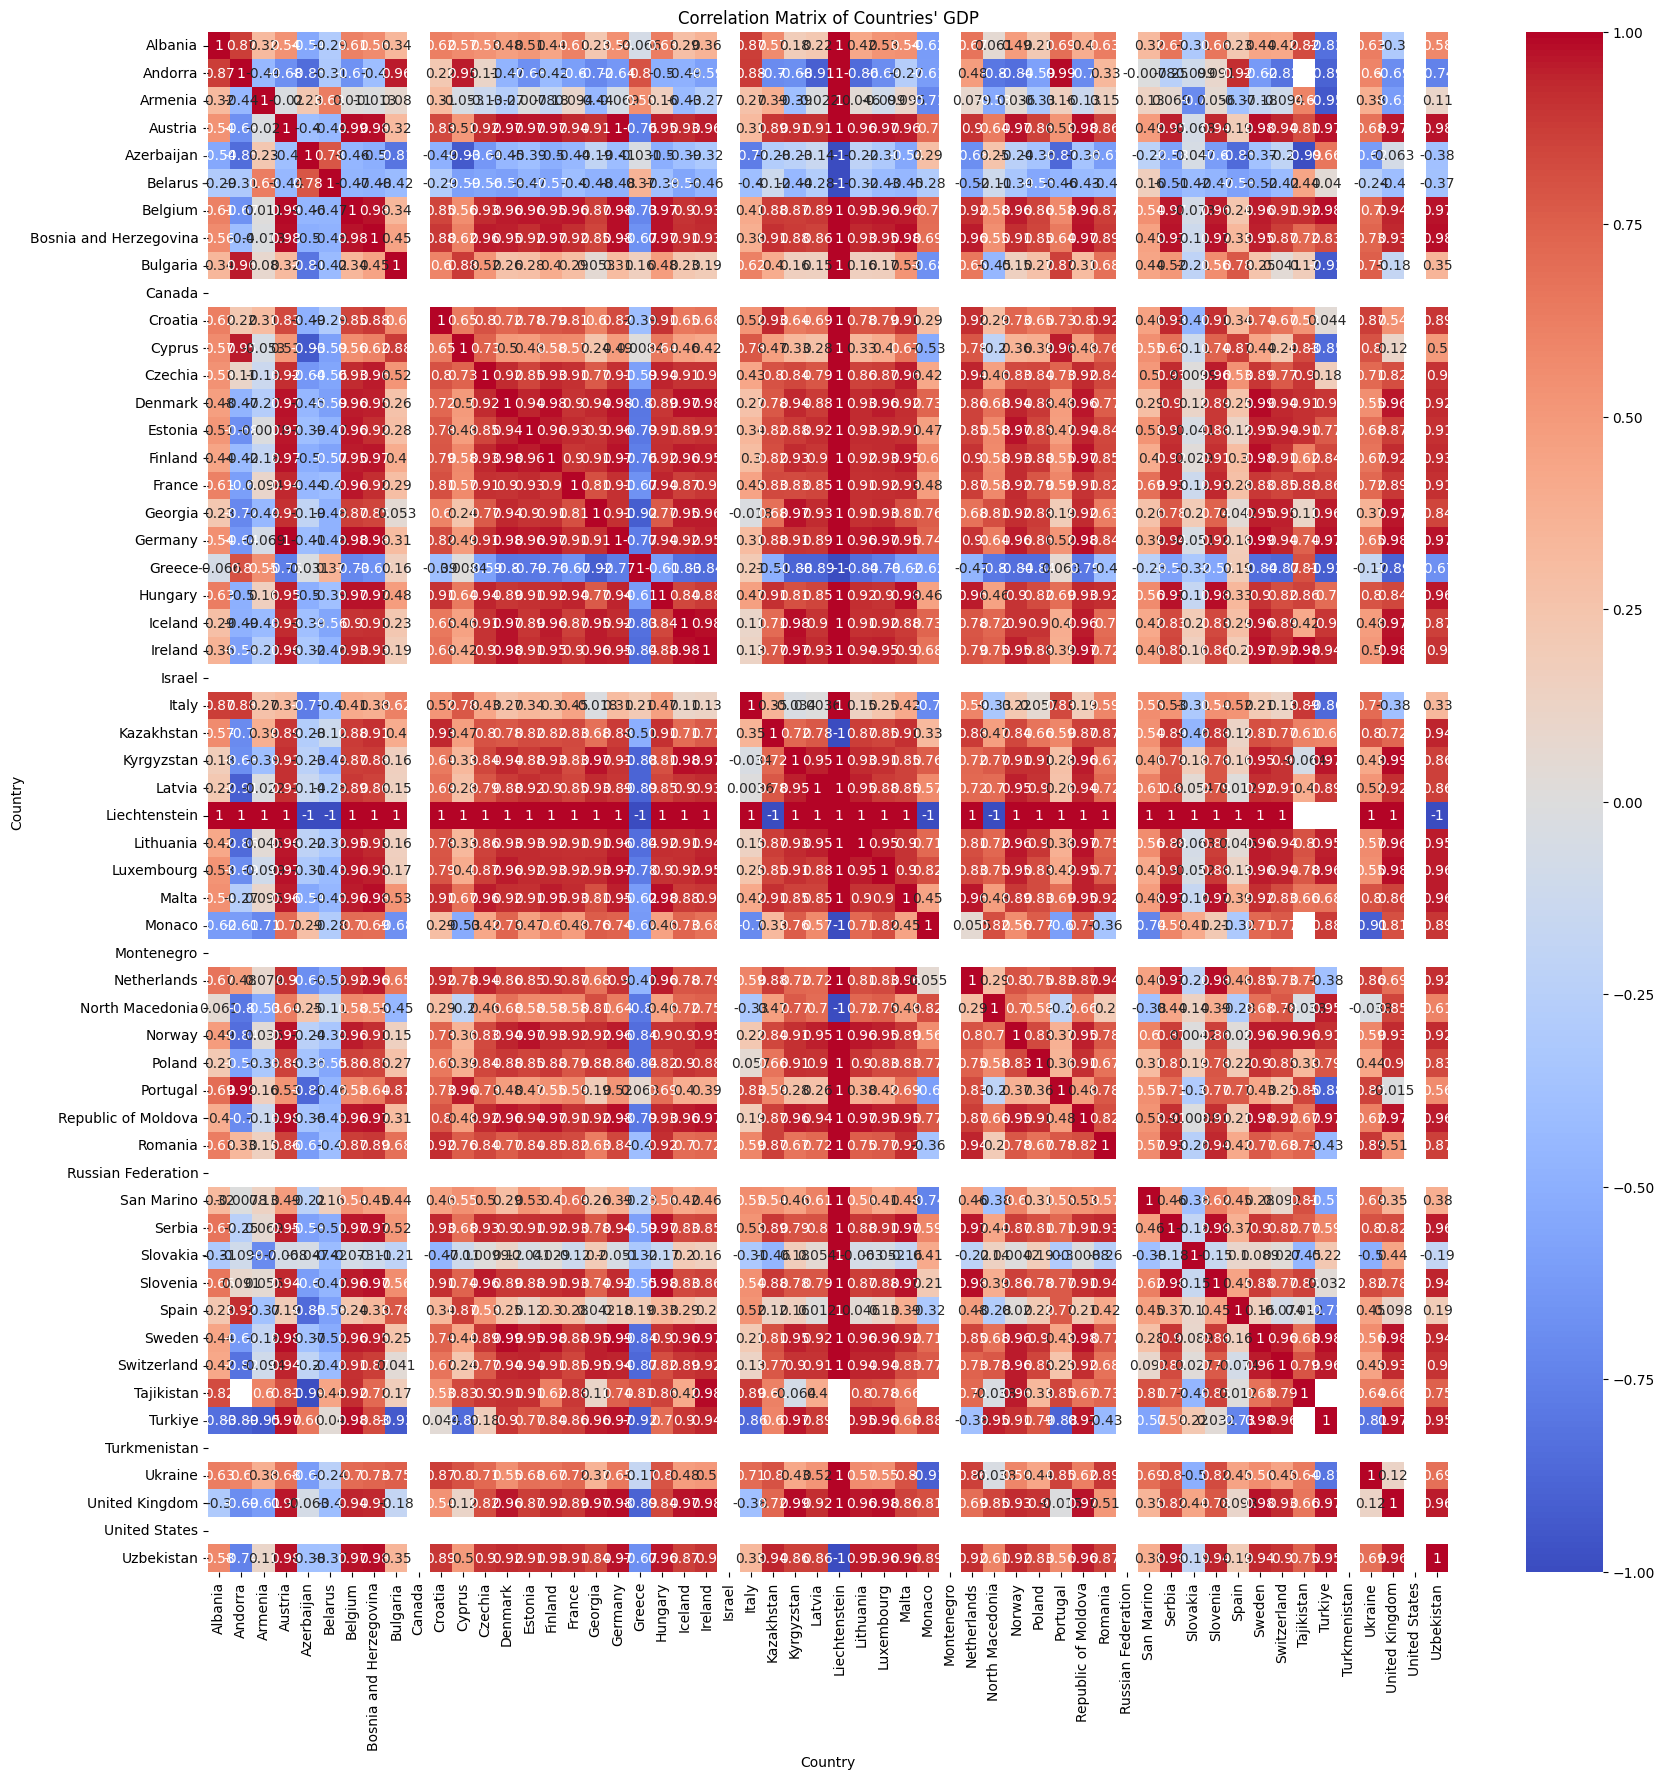

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Countries' GDP")
plt.show()

In [117]:

merge_aux = pd.merge(df_housePriceIndex, df_buildingPermits, on="Date")
#merge_aux1 = pd.merge(merge_aux, df_housePriceIndexRO, on="Date")
#merge_aux2 = pd.merge(merge_aux, df_final, on="Date")
merge_aux3 = pd.merge( merge_aux, df_enterprises, on="Date")
merge_aux4 = pd.merge(merge_aux3, df_contructionCostIndex, on="Date")
merge_aux5 = pd.merge(merge_aux4, df_labourCost, on="Date")
#merge_aux5.to_csv('out.csv', index=False)
merge_aux5['Date'] = pd.to_datetime(merge_aux5['Date']).dt.year
df_final['Date'] = df_final['Date'].astype(int)
merge_aux5  = pd.merge(merge_aux5, df_final, on="Date")
merge_aux5
#df_housePriceIndexPT

,Date,House Price Index DENMARK,House Price Index IRELAND,House Price Index ICELAND,Residential Permits % DENMARK,1 dwelling Permits DENMARK,2+ dwelling Permits DENMARK,Residential Permits % IRL,1 dwelling Permits IRL,2+ dwelling Permits IRL,...,Construction cost index DENMARK,Construction cost index IRELAND,Construction cost index ICELAND,Labour Costs ICELAND,Labour Costs IRELAND,Labour Costs DENMARK,Country,"GDP at current prices and PPPs, millions of US$","GDP: in construction (ISIC4 F), output approach, per cent share of GVA",GDP construction
0,2010,100.0,100.0,100.0,66.6,87.5,50.8,141.7,113.2,246.0,...,89.6,99.3,90.3,96.9,85.8,72.4,Albania,28046.0,14.9,4178.854
1,2010,100.0,100.0,100.0,66.6,87.5,50.8,141.7,113.2,246.0,...,89.6,99.3,90.3,96.9,85.8,72.4,Andorra,3048.0,9.5,289.560
2,2010,100.0,100.0,100.0,66.6,87.5,50.8,141.7,113.2,246.0,...,89.6,99.3,90.3,96.9,85.8,72.4,Armenia,21600.0,NaN,NaN
3,2010,100.0,100.0,100.0,66.6,87.5,50.8,141.7,113.2,246.0,...,89.6,99.3,90.3,96.9,85.8,72.4,Austria,351342.0,6.5,22837.230
4,2010,100.0,100.0,100.0,66.6,87.5,50.8,141.7,113.2,246.0,...,89.6,99.3,90.3,96.9,85.8,72.4,Azerbaijan,132907.0,8.7,11562.909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,2020,136.2,127.2,165.1,149.4,152.6,146.9,324.8,172.8,882.7,...,105.8,109.4,111.9,135.5,151.4,125.4,Turkmenistan,NaN,NaN,NaN
612,2020,136.2,127.2,165.1,149.4,152.6,146.9,324.8,172.8,882.7,...,105.8,109.4,111.9,135.5,151.4,125.4,Ukraine,546335.0,3.3,18029.055
613,2020,136.2,127.2,165.1,149.4,152.6,146.9,324.8,172.8,882.7,...,105.8,109.4,111.9,135.5,151.4,125.4,United Kingdom,NaN,NaN,NaN
614,2020,136.2,127.2,165.1,149.4,152.6,146.9,324.8,172.8,882.7,...,105.8,109.4,111.9,135.5,151.4,125.4,United States,21060474.0,NaN,NaN


In [101]:
merge_aux5.columns = merge_aux5.columns.str.replace(r'\bIRL\b', 'IRELAND')
merge_aux5.columns = merge_aux5.columns.str.replace(r'\bPT\b', 'PORTUGAL')
merge_aux5.columns = merge_aux5.columns.str.replace(r'\bRO\b', 'ROMANIA')

#merge_aux5.info()
#merge_aux5.to_csv('out.csv', index=False)
df_loc = merge_aux5.melt(id_vars='Date', var_name='Metric', value_name='Value')
df_loc[['Metric', 'COUNTRY']] = df_loc['Metric'].str.rsplit(' ', 1, expand=True)

# Pivot the DataFrame to get metrics as columns
df_loc = df_loc.pivot_table(index=['Date', 'COUNTRY'], columns='Metric', values='Value').reset_index()

# Renaming the columns
df_loc.columns.name = None
df_loc.columns = df_loc.columns.str.replace(' ', '_')

df_loc
#melted_df = pd.melt(merge_aux5, id_vars='date', var_name='COUNTRY', value_name='VALUE')
#melted_df = melted_df.drop_duplicates()

# Reshape the data into the desired format
#reshaped_df = melted_df.pivot(index='date', columns='COUNTRY', values='VALUE').reset_index()
#merge_aux5.columns


<ipython-input-101-56a1a5e02a63>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  merge_aux5.columns = merge_aux5.columns.str.replace(r'\bIRL\b', 'IRELAND')
<ipython-input-101-56a1a5e02a63>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  merge_aux5.columns = merge_aux5.columns.str.replace(r'\bPT\b', 'PORTUGAL')
<ipython-input-101-56a1a5e02a63>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  merge_aux5.columns = merge_aux5.columns.str.replace(r'\bRO\b', 'ROMANIA')
<ipython-input-101-56a1a5e02a63>:8: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df_loc[['Metric', 'COUNTRY']] = df_loc['Metric'].str.rsplit(' ', 1, expand=True)


,Date,COUNTRY,1_dwelling_Permits,2+_dwelling_Permits,Construction_cost_index,House_Price_Index,Labour_Costs,Number_of_Companies,Number_of_Emplyees,Residential_Permits_%
0,2010-01-01,DENMARK,87.5,50.8,89.6,100.00,72.4,31588.0,132148.0,66.6
1,2010-01-01,ICELAND,92.2,43.4,90.3,100.00,96.9,87119.0,266616.0,56.9
2,2010-01-01,IRELAND,113.2,246.0,99.3,100.00,85.8,52607.0,69777.0,141.7
3,2011-01-01,DENMARK,83.1,65.7,92.8,98.30,78.7,31575.0,154606.0,73.2
4,2011-01-01,ICELAND,77.9,50.1,93.0,102.60,100.3,91540.0,282745.0,57.8
5,2011-01-01,IRELAND,88.8,91.2,97.1,82.92,79.0,50256.0,61197.0,89.3
6,2012-01-01,DENMARK,62.7,46.3,95.2,95.65,85.4,31300.0,155865.0,53.3
7,2012-01-01,ICELAND,59.8,47.0,95.4,103.90,101.8,93598.0,288820.0,50.5
8,2012-01-01,IRELAND,52.6,30.8,98.1,71.76,72.4,49530.0,55736.0,47.9
9,2013-01-01,DENMARK,60.6,43.6,96.6,99.37,89.0,30707.0,154734.0,50.9


In [ ]:
merge_aux5.columns = merge_aux5.columns.str.replace('IRL', 'IRELAND').replace('PT', 'PORTUGAL').replace('RO', 'ROMANIA')
"""
melted_df = pd.melt(merge_aux5, id_vars='Date', var_name='Country', value_name='Value')
melted_df[['Country', 'Indicator']] = melted_df['Country'].str.split(' ', 1, expand=True)
pivoted_df = melted_df.pivot(index='Date', columns='Indicator', values='Value').reset_index()
pivoted_df.columns = ['Date', 'House Price Index IRELAND', 'House Price Index PORTUGAL',
       'House Price Index ROMANIA', 'Residential Permits IRL',
       'Residential Permits % IRL', '1 dwelling Permits IRL',
       '2+ dwelling Permits IRL', 'Residential Permits PT',
       'Residential Permits % PT', '1 dwelling Permits PT',
       '2+ dwelling Permits PT', 'Residential Permits RO',
       'Residential Permits % RO', 'Number of Companies IRELAND',
       'Number of Emplyees IRELAND', 'Number of Companies PORTUGAL',
       'Number of Emplyees PORTUGAL', 'Number of Companies ROMANIA',
       'Number of Emplyees ROMANIA', 'Construction cost index IRELAND',
       'Construction cost index PORTUGAL', 'Construction cost index ROMANIA',
       'Labour Costs IRELAND', 'Labour Costs PORTUGAL',
       'Labour Costs ROMANIA']
"""


<ipython-input-64-7a3c8f1fe9e6>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  melted_df[['Country', 'Indicator']] = melted_df['Country'].str.split(' ', 1, expand=True)


ValueError: ignored

In [ ]:
dff_labourCosts = df_labourCosts[(df_labourCosts["Economic Sector NACE Rev 2"] == 'Construction (F)')
                                  & (df_labourCosts["Type of Employee"] == 'All employees')
                                  & (df_labourCosts["Statistic Label"] ==  'Average Hourly Earnings')])
dff_labourCosts['Quarter'] = dff_labourCosts['Quarter'].str.split('Q').str[0].astype(int)
dff_labourCosts['VALUE'] = dff_labourCosts['VALUE'].astype(float)
labourCosts_final = dff_labourCosts.groupby(['Quarter'])['VALUE'].mean().reset_index()


<ipython-input-26-18c7a441ba21>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_labourCosts['Quarter'] = dff_labourCosts['Quarter'].str.split('Q').str[0].astype(int)
<ipython-input-26-18c7a441ba21>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_labourCosts['VALUE'] = dff_labourCosts['VALUE'].astype(float)


,Quarter,VALUE
0,2008,20.0900
1,2009,20.9425
2,2010,20.1625
3,2011,19.0750
4,2012,19.3450
5,2013,19.5625
6,2014,19.5300
7,2015,19.5300
8,2016,19.8475
9,2017,20.1275


In [ ]:
new_df = pd.DataFrame()
import re

#housing prices
filtered_housingPrices = df_housingPrices[(df_housingPrices["Type of Dwelling"] == 'All Dwelling Types') 
                    & (df_housingPrices["Dwelling Status"] == 'All Dwelling Statuses') 
                    & (df_housingPrices["Sectoral Flow"] == 'All sectoral flow types') 
                    & (df_housingPrices["Type of Sale"] == 'All Sale Types')
                    & (df_housingPrices["Statistic Label"] == 'Mean Sale Price')]

housing_final = filtered_housingPrices.groupby('Year').mean().reset_index()

################################################################################################################################################################

#rent prices
dff_rentPrices = df_rentPrices[(df_rentPrices["Number of Bedrooms"] ==  'All bedrooms')
                                 & (df_rentPrices["Property Type"] ==  'All property types')]
dff_rentPrices['Location'] =  dff_rentPrices['Location'].str.replace(r'\b( Town| City)\b', '', regex=True)
dff_rentPrices['Location'] =  dff_rentPrices['Location'].str.split(', ').str[-1]
dff_rentPrices['Location'] =  dff_rentPrices['Location'].str.replace(' ', '', case=False)
dff_rentPrices['Location'] =  dff_rentPrices['Location'].str.split(',', n=1).str[0]
dff_rentPrices.loc[dff_rentPrices['Location'].str.contains('Dublin', case=False), 'Location'] = 'Dublin'

rent_final = dff_rentPrices.groupby(['Year'])['VALUE'].mean().reset_index()

################################################################################################################################################################

merge = pd.merge(housing_final, rent_final, on='Year')


#GDP
data = {
    'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'GDP (USD)': [253.31, 217.98, 224.24, 231.34, 244.72, 249.03, 271.92, 294.80, 326.99, 348.28, 385.58, 385.94, 360.91, 504.2, 578]
}

df_GDP = pd.DataFrame(data)

################################################################################################################################################################

merge1 = pd.merge(merge, df_GDP, on='Year')

#Population
filter_population = df_population[(df_population['Year'] > 2009) 
                                  & (df_population['Single Year of Age'] == 'All ages') 
                                   & (df_population['Sex'] == 'Both sexes')]
filter_population

################################################################################################################################################################

merge2 = pd.merge(merge1, filter_population, on='Year')

#Wages
dff_wages = df_labourCosts[(df_labourCosts["Economic Sector NACE Rev 2"] == 'All NACE economic sectors')
                                  & (df_labourCosts["Type of Employee"] == 'All employees')
                                   & (df_labourCosts["Statistic Label"] == 'Average Weekly Earnings')]

dff_wages['Quarter'] = dff_wages['Quarter'].str.split('Q').str[0].astype(int)

dff_wages['VALUE'] = dff_wages['VALUE'].astype(float)
wages_final = dff_wages.groupby(['Quarter'])['VALUE'].mean().reset_index()


################################################################################################################################################################

#Immigration

filter_immigration = df_immigration[(df_immigration['Year'] > 2009) & (df_immigration['Component'] == 'Net migration')]


################################################################################################################################################################

merge3 = pd.merge(merge2, filter_immigration, on='Year')

#Number of Buildings Built

filter_buildingsBuilt = df_buildingsBuilt[(df_buildingsBuilt['Year'] > 2009) 
                                  & (df_buildingsBuilt['Type of House'] == 'All house types')]

################################################################################################################################################################

merge4 = pd.merge(merge3, filter_buildingsBuilt, on='Year')

#Number of Construction Workers
filter_constructionWorkers = df_constructionWorkers[(df_constructionWorkers['Sex'] == 'Both sexes') 
                                  & (df_constructionWorkers['NACE Rev 2 Economic Sector'] == 'Construction (F)')
                                  & (df_constructionWorkers['Statistic Label'] == 'Persons aged 15-89 years in Employment')]

filter_constructionWorkers['Quarter'] = filter_constructionWorkers['Quarter'].str.split('Q').str[0].astype(int)
constructionWorkers_final = filter_constructionWorkers.groupby('Quarter').mean().reset_index()

merge5 = pd.merge(wages_final, constructionWorkers_final, on='Quarter')

################################################################################################################################################################

#Labour Costs
dff_labourCosts = df_labourCosts[(df_labourCosts["Economic Sector NACE Rev 2"] == 'Construction (F)')
                                  & (df_labourCosts["Type of Employee"] == 'All employees')
                                  & (df_labourCosts["Statistic Label"] ==  'Average Hourly Earnings')]
dff_labourCosts['Quarter'] = dff_labourCosts['Quarter'].str.split('Q').str[0].astype(int)
dff_labourCosts['VALUE'] = dff_labourCosts['VALUE'].astype(float)
labourCosts_final = dff_labourCosts.groupby(['Quarter'])['VALUE'].mean().reset_index()

################################################################################################################################################################
merge6 = pd.merge(merge5, labourCosts_final, on='Quarter')



<ipython-input-31-2e77136008f8>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  housing_final = filtered_housingPrices.groupby('Year').mean().reset_index()
<ipython-input-31-2e77136008f8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff_rentPrices['Location'] =  dff_rentPrices['Location'].str.replace(r'\b( Town| City)\b', '', regex=True)
<ipython-input-31-2e77136008f8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
merge4


,Year,TLIST(A1)_x,C03341V04028,VALUE_x,VALUE_y,GDP (USD),STATISTIC_x,STATISTIC Label_x,TLIST(A1)_y,C02076V03371,...,Component,UNIT_y,VALUE_y,STATISTIC,STATISTIC Label,TLIST(A1)_y,C02342V02816,Type of House,UNIT,VALUE
0,2011,2011.0,1.5,163169.5,776.706590,231.34,PEA11,Population estimates from 1926,2011,-,...,Net migration,Thousand,-27.4,NDA02,New Dwelling Completions,2011,-,All house types,Number,6994
1,2012,2012.0,1.5,154624.0,777.625115,244.72,PEA11,Population estimates from 1926,2012,-,...,Net migration,Thousand,-25.7,NDA02,New Dwelling Completions,2012,-,All house types,Number,4911
2,2013,2013.0,1.5,167475.5,795.414365,249.03,PEA11,Population estimates from 1926,2013,-,...,Net migration,Thousand,-18.7,NDA02,New Dwelling Completions,2013,-,All house types,Number,4575
3,2014,2014.0,1.5,186569.0,839.267460,271.92,PEA11,Population estimates from 1926,2014,-,...,Net migration,Thousand,-8.5,NDA02,New Dwelling Completions,2014,-,All house types,Number,5518
4,2015,2015.0,1.5,195063.5,907.508588,294.80,PEA11,Population estimates from 1926,2015,-,...,Net migration,Thousand,5.9,NDA02,New Dwelling Completions,2015,-,All house types,Number,7219
5,2016,2016.0,1.5,216028.5,970.897945,326.99,PEA11,Population estimates from 1926,2016,-,...,Net migration,Thousand,16.2,NDA02,New Dwelling Completions,2016,-,All house types,Number,9821
6,2017,2017.0,1.5,237775.0,1047.003779,348.28,PEA11,Population estimates from 1926,2017,-,...,Net migration,Thousand,19.8,NDA02,New Dwelling Completions,2017,-,All house types,Number,14296
7,2018,2018.0,1.5,253448.0,1140.117156,385.58,PEA11,Population estimates from 1926,2018,-,...,Net migration,Thousand,34.0,NDA02,New Dwelling Completions,2018,-,All house types,Number,17872
8,2019,2019.0,1.5,259975.0,1207.045721,385.94,PEA11,Population estimates from 1926,2019,-,...,Net migration,Thousand,33.7,NDA02,New Dwelling Completions,2019,-,All house types,Number,21126
9,2020,2020.0,1.5,264754.0,1243.227297,360.91,PEA11,Population estimates from 1926,2020,-,...,Net migration,Thousand,28.9,NDA02,New Dwelling Completions,2020,-,All house types,Number,20574


In [ ]:
merge6 = merge6.rename(columns={'Quarter': 'Year', 'VALUE_x': 'VALUE_xVALUE_x', 'TLIST(Q1)': 'TLIST(Q1)TLIST(Q1)', 'VALUE_y': 'VALUE_yVALUE_y', 'VALUE': 'VALUEVALUE'})

In [ ]:
merge_final = pd.merge(merge6, merge4, on='Year')
merge_final

#merge6

,Year,VALUE_xVALUE_x,TLIST(Q1)TLIST(Q1),VALUE_yVALUE_y,VALUEVALUE,TLIST(A1)_x,C03341V04028,VALUE_x,VALUE_y,GDP (USD),...,Component,UNIT_y,VALUE_y,STATISTIC,STATISTIC Label,TLIST(A1)_y,C02342V02816,Type of House,UNIT,VALUE
0,2011,688.9475,20112.5,88.025,19.0750,2011.0,1.5,163169.5,776.706590,231.34,...,Net migration,Thousand,-27.4,NDA02,New Dwelling Completions,2011,-,All house types,Number,6994
1,2012,693.5750,20122.5,83.325,19.3450,2012.0,1.5,154624.0,777.625115,244.72,...,Net migration,Thousand,-25.7,NDA02,New Dwelling Completions,2012,-,All house types,Number,4911
2,2013,691.4200,20132.5,85.750,19.5625,2013.0,1.5,167475.5,795.414365,249.03,...,Net migration,Thousand,-18.7,NDA02,New Dwelling Completions,2013,-,All house types,Number,4575
3,2014,693.1000,20142.5,93.725,19.5300,2014.0,1.5,186569.0,839.267460,271.92,...,Net migration,Thousand,-8.5,NDA02,New Dwelling Completions,2014,-,All house types,Number,5518
4,2015,701.0875,20152.5,108.525,19.5300,2015.0,1.5,195063.5,907.508588,294.80,...,Net migration,Thousand,5.9,NDA02,New Dwelling Completions,2015,-,All house types,Number,7219
5,2016,710.2700,20162.5,118.375,19.8475,2016.0,1.5,216028.5,970.897945,326.99,...,Net migration,Thousand,16.2,NDA02,New Dwelling Completions,2016,-,All house types,Number,9821
6,2017,723.7625,20172.5,128.650,20.1275,2017.0,1.5,237775.0,1047.003779,348.28,...,Net migration,Thousand,19.8,NDA02,New Dwelling Completions,2017,-,All house types,Number,14296
7,2018,747.4525,20182.5,143.150,20.9300,2018.0,1.5,253448.0,1140.117156,385.58,...,Net migration,Thousand,34.0,NDA02,New Dwelling Completions,2018,-,All house types,Number,17872
8,2019,774.6750,20192.5,146.875,21.6800,2019.0,1.5,259975.0,1207.045721,385.94,...,Net migration,Thousand,33.7,NDA02,New Dwelling Completions,2019,-,All house types,Number,21126
9,2020,814.9900,20202.5,135.300,22.0875,2020.0,1.5,264754.0,1243.227297,360.91,...,Net migration,Thousand,28.9,NDA02,New Dwelling Completions,2020,-,All house types,Number,20574


In [ ]:
## Housing Prices
#TO DO - existem 1610 valores NULL na coluna VALUE. Encontrar a melhor forma de preencher este valores!! A1
# Soma dos valores null
#df_housingPrices[df_housingPrices["Type of Dwelling"].str.contains("All Dwelling Types").loc[:, ["Year", "VALUE"]]]
#df_labourCosts[df_labourCosts["Type of Employee"].str.contains("All employees")].loc[:, ["Quarter", "VALUE"]].isnull().sum()
"""
df_housingPrices[(df_housingPrices["Type of Dwelling"] == 'House') 
                    & (df_housingPrices["Dwelling Status"] == 'Existing') 
                    & (df_housingPrices["Sectoral Flow"] == 'All sectoral flow types') 
                    & (df_housingPrices["Type of Sale"] == 'All Sale Types')
                    & (df_housingPrices["Statistic Label"] == 'Mean Sale Price')]
"""
#df_housingPrices.columns
#df_housingPrices

## Labour Costs
#TO DO - existem 1610 valores NULL na coluna VALUE. Encontrar a melhor forma de preencher este valores!! A1
# Soma dos valores null
#df_labourCosts[df_labourCosts["Type of Employee"].str.contains("All employees")].loc[:, ["Quarter", "VALUE"]].isnull().sum()
#df_labourCosts


"""
locations = df_rentPrices["Location"].unique()
updated_locations = [location.split(", ")[-1] for location in locations]

# Print the updated location names
for location in updated_locations:
    print(location)
"""
df_immigration
#df_rentPrices[(df_rentPrices["Number of Bedrooms"] ==  'All bedrooms')
#              & (df_rentPrices["Property Type"] ==  'All property types')]

## Construction Workers
#TO DO - existem 307 valores NULL na coluna VALUE. Encontrar a melhor forma de preencher este valores!! A1
# Soma dos valores null
#df_constructionWorkers[df_constructionWorkers["Sex"].str.contains("Both sexes")].loc[:, ["Quarter", "VALUE"]].isnull().sum()

#df_constructionWorkers
#df_buildingsBuilt[df_buildingsBuilt["Type of House"].str.contains("All house types")].loc[:,["Year", "VALUE"]]
#df_buildingsBuilt

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02541V03076,Component,UNIT,VALUE
0,PEA15,Annual Population Change,1951,1951,1,Annual births,Thousand,NaN
1,PEA15,Annual Population Change,1951,1951,2,Annual deaths,Thousand,NaN
2,PEA15,Annual Population Change,1951,1951,3,Natural increase,Thousand,26.6
3,PEA15,Annual Population Change,1951,1951,4,Immigrants,Thousand,NaN
4,PEA15,Annual Population Change,1951,1951,5,Emigrants,Thousand,NaN
...,...,...,...,...,...,...,...,...
571,PEA15,Annual Population Change,2022,2022,4,Immigrants,Thousand,120.7
572,PEA15,Annual Population Change,2022,2022,5,Emigrants,Thousand,59.6
573,PEA15,Annual Population Change,2022,2022,6,Net migration,Thousand,61.1
574,PEA15,Annual Population Change,2022,2022,7,Population change,Thousand,88.8
